***
# <h1 align="center"><font color="darkblue">**NHANES Data Analysis of Heavy Metals**</h1></font>
## <h1 align ="center">*Robert M. Taylor*, PhD</h1> 
***

#### <h1 align="center"><font color = "darkgreen" size=6>*This notebook is for the analysis of heavy metals in the NHANES datasets from 2017-2018 (2019-2020 is not out yet, as of the writing of this notebook).* The data can be found at __[NHANES DATA](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017)__</font></h1>
<!-- #### <h1 align="center"><font color = "darkgreen" size="6">The data can be found at __[NHANES DATA](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017)__</font></h1> -->

#### import modules

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [33]:
print("current working directory is", os.getcwd())

current working directory is /Users/tulip_home/Dropbox/rmtaylor/projects/NHANES


#### I'll first load in the data sets and tranform them to .csv files

In [34]:
# demographics = pd.read_sas("DEMO_J.xpt")
# chromCobalt = pd.read_sas("CRCO_J.xpt")
# biopro = pd.read_sas("BIOPRO_J.xpt")
# huq = pd.read_sas("HUQ_J.xpt")
# ocq = pd.read_sas("OCQ_J.xpt")
# pbcd = pd.read_sas("PBCD_J.xpt")
# puqmec = pd.read_sas("PUQMEC_J.xpt")
# smq = pd.read_sas("SMQ_J.xpt")
# smqfam = pd.read_sas("SMQFAM_J.xpt")

In [35]:
# demographics.to_csv("demo.csv")
# chromCobalt.to_csv("chromCopper.csv")
# biopro.to_csv("biopro.csv")
# huq.to_csv("huq.csv")
# ocq.to_csv("ocq.csv")
# pbcd.to_csv("pbcd.csv")
# puqmec.to_csv("puqmec.csv")
# smq.to_csv("smq.csv")
# smqfam.to_csv("smqfam.csv")

<h1 align="center"><font size=4>The datasets contain a lot of info that I do not need included. Therefore, I used excel to pull out only the features I need. I'll now combine them into a single dataset called "NHANES_combined.csv"</h1></font>

In [36]:
demo = pd.read_csv("demo1.csv")
biopro = pd.read_csv("biopro1.csv")
chromCob = pd.read_csv("chromCobalt1.csv")
huq = pd.read_csv("huq1.csv")
pbcd = pd.read_csv("pbcd1.csv")
puqmec = pd.read_csv("puqmec1.csv")
smq = pd.read_csv("smq1.csv")

In [37]:
NHANES_combined = pd.merge(demo, biopro)
NHANES_combined = pd.merge(NHANES_combined, chromCob)
NHANES_combined = pd.merge(NHANES_combined, huq)
NHANES_combined = pd.merge(NHANES_combined, pbcd)
NHANES_combined = pd.merge(NHANES_combined, puqmec)
NHANES_combined = pd.merge(NHANES_combined, smq)
NHANES_combined.head(2)

ID  Gender  Age_years  Age_months  BirthCountry  HouseholdSize  \
0  93705       2       66.0         NaN             1              1   
1  93708       2       66.0         NaN             2              2   

   FamilySize  AnnualHouseIncome  AnnualFamilyIncome  \
0           1                3.0                 3.0   
1           2                6.0                 6.0   

   RatioFamilyIncomePoverty  ...  BloodSelenium_ug/L  BloodSelenium_umol/L  \
0                      0.82  ...              185.71                  2.36   
1                      1.63  ...              178.79                  2.27   

   BloodMang_ug/L  BloodMang_nmol/L  PesticideUseHome  PesticideUsedWeeds  \
0            8.57            155.99               2.0                 2.0   
1           15.09            274.67               2.0                 2.0   

   AgeStartedSmoking  SmokeNow  CigsPerDay30Days  EverUsedEcig  
0               16.0       3.0               NaN           2.0  
1                NaN       NaN               NaN           2.0  

[2 rows x 48 columns]

In [38]:
NHANES_combined.shape

(3676, 48)

In [39]:
NHANES_combined.columns

Index(['ID', 'Gender', 'Age_years', 'Age_months', 'BirthCountry',
       'HouseholdSize', 'FamilySize', 'AnnualHouseIncome',
       'AnnualFamilyIncome', 'RatioFamilyIncomePoverty', 'Albumin_g/L',
       'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L', 'Creatinine_umol/L',
       'Globulin_g/L', 'Glu_mg/dL', 'Glu_mmol/L', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Chromium_ug/L', 'Chromium_nmol/L', 'Cobalt_ug/L',
       'Cobalt_nmol/L', 'GeneralHealthCondition', 'HealthComparedto1year',
       'MostOftenHealthcarePlace', 'ReceiveHealthPastYear',
       'TimeSinceLastVisit', 'BloodLead_ug/dL', 'BloodLead_umol/L',
       'BloodCadmium_ug/L', 'BloodCadmium_nmol/L', 'BloodMercury_ug/L',
       'BloodMercury_nmol/L', 'BloodSelenium_ug/L', 'BloodSelenium_umol/L',
       'BloodMang_ug/L', 'BloodMang_nmol/L', 'PesticideUseHome',
       'PesticideUsedWeeds', 'AgeStartedSmoking', 'SmokeNow',
       'CigsPerDay30Days', 'EverUsed

In [40]:
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3676 non-null   int64  
 1   Gender                    3676 non-null   int64  
 2   Age_years                 3676 non-null   float64
 3   Age_months                0 non-null      float64
 4   BirthCountry              3676 non-null   int64  
 5   HouseholdSize             3676 non-null   int64  
 6   FamilySize                3676 non-null   int64  
 7   AnnualHouseIncome         3483 non-null   float64
 8   AnnualFamilyIncome        3495 non-null   float64
 9   RatioFamilyIncomePoverty  3181 non-null   float64
 10  Albumin_g/L               3443 non-null   float64
 11  Bicarb_mmol/L             3442 non-null   float64
 12  BUN_mmol/L                3442 non-null   float64
 13  Chloride_mmol/L           3443 non-null   float64
 14  Creatini

### <h1 align="center"><font size=4>I can see that multiple columns have null values which will need to be fixed. I also see that there are a couple columns that are mostly null (i.e. "Age_months", "TimeSinceLastVisit", "AgeStartedSmoking", "SmokeNow", and "CigsPerDay30Days").</h1></font>
#### - I will delete the "Age_months" and "TimeSinceLastVisit", "CigsPerDay30Days", and "AgeStartedSmoking" columns.
#### - I will fill the null values in "SmokeNow" to 0 or False
    

In [41]:
NHANES_combined = NHANES_combined.drop(["Age_months", "TimeSinceLastVisit", "CigsPerDay30Days", "AgeStartedSmoking"], axis=1)
NHANES_combined.shape

(3676, 44)

In [42]:
NHANES_combined.SmokeNow.unique()

array([ 3., nan,  1.,  2.])

In [43]:
NHANES_combined.SmokeNow.value_counts()

3.0    1039
1.0     497
2.0     119
Name: SmokeNow, dtype: int64

<h1 align="center"><font size=4>I can see from the data key provided by NHANES, that "3" is doesn't smoke at all. Therefore, the null values are truly missing and not "non smokers." Therefore, I will fill the null values in this column to "9" for "don't know" instead.</h1></font> 

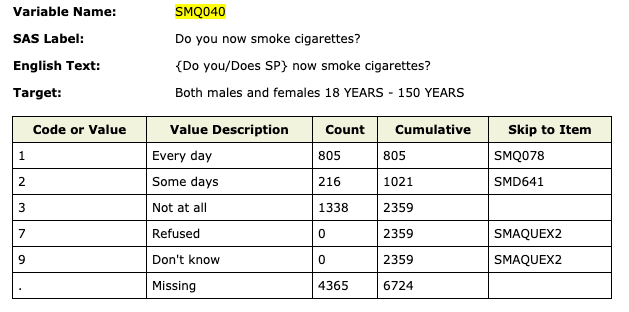

In [44]:
NHANES_combined.SmokeNow = NHANES_combined.SmokeNow.fillna(9)
NHANES_combined.SmokeNow.value_counts()

9.0    2021
3.0    1039
1.0     497
2.0     119
Name: SmokeNow, dtype: int64

<h1 align="center"><font size=6> I'd also like to change the SmokeNow to a categorical rather than a float type</h1></font>

In [45]:
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3676 non-null   int64  
 1   Gender                    3676 non-null   int64  
 2   Age_years                 3676 non-null   float64
 3   BirthCountry              3676 non-null   int64  
 4   HouseholdSize             3676 non-null   int64  
 5   FamilySize                3676 non-null   int64  
 6   AnnualHouseIncome         3483 non-null   float64
 7   AnnualFamilyIncome        3495 non-null   float64
 8   RatioFamilyIncomePoverty  3181 non-null   float64
 9   Albumin_g/L               3443 non-null   float64
 10  Bicarb_mmol/L             3442 non-null   float64
 11  BUN_mmol/L                3442 non-null   float64
 12  Chloride_mmol/L           3443 non-null   float64
 13  Creatinine_umol/L         3442 non-null   float64
 14  Globulin

<h1 align="center"><font size=4> I'd also like to look at the "RatioFamilyIncomePoverty" column now since it has the most missing values now.</h1></font>

In [46]:
NHANES_combined.RatioFamilyIncomePoverty.value_counts()

5.000000e+00    602
5.400000e-79     26
1.220000e+00     26
1.520000e+00     24
3.080000e+00     22
               ... 
3.280000e+00      1
4.580000e+00      1
3.700000e+00      1
4.130000e+00      1
4.850000e+00      1
Name: RatioFamilyIncomePoverty, Length: 404, dtype: int64

<h1 align="center"><font size=4> There are quite a few values. Here, I will fill the missing values with the most frequent value which is 5.0</h1><font>

In [47]:
NHANES_combined.RatioFamilyIncomePoverty = NHANES_combined.RatioFamilyIncomePoverty.fillna(5.0)
NHANES_combined.RatioFamilyIncomePoverty.value_counts()

5.000000e+00    1097
5.400000e-79      26
1.220000e+00      26
1.520000e+00      24
3.080000e+00      22
                ... 
3.280000e+00       1
4.580000e+00       1
3.700000e+00       1
4.130000e+00       1
4.850000e+00       1
Name: RatioFamilyIncomePoverty, Length: 404, dtype: int64

In [48]:
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3676 non-null   int64  
 1   Gender                    3676 non-null   int64  
 2   Age_years                 3676 non-null   float64
 3   BirthCountry              3676 non-null   int64  
 4   HouseholdSize             3676 non-null   int64  
 5   FamilySize                3676 non-null   int64  
 6   AnnualHouseIncome         3483 non-null   float64
 7   AnnualFamilyIncome        3495 non-null   float64
 8   RatioFamilyIncomePoverty  3676 non-null   float64
 9   Albumin_g/L               3443 non-null   float64
 10  Bicarb_mmol/L             3442 non-null   float64
 11  BUN_mmol/L                3442 non-null   float64
 12  Chloride_mmol/L           3443 non-null   float64
 13  Creatinine_umol/L         3442 non-null   float64
 14  Globulin

<h1 align="center"><font size=4> It looks like there are 3,440 records for the feature with the most null values now (i.e. Potassium). This is plenty for this project. So, I'll now delete all records with null values in any column and see what we're left with.</h1></font>

In [49]:
NHANES_combined = NHANES_combined.dropna()
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770 entries, 0 to 3675
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2770 non-null   int64  
 1   Gender                    2770 non-null   int64  
 2   Age_years                 2770 non-null   float64
 3   BirthCountry              2770 non-null   int64  
 4   HouseholdSize             2770 non-null   int64  
 5   FamilySize                2770 non-null   int64  
 6   AnnualHouseIncome         2770 non-null   float64
 7   AnnualFamilyIncome        2770 non-null   float64
 8   RatioFamilyIncomePoverty  2770 non-null   float64
 9   Albumin_g/L               2770 non-null   float64
 10  Bicarb_mmol/L             2770 non-null   float64
 11  BUN_mmol/L                2770 non-null   float64
 12  Chloride_mmol/L           2770 non-null   float64
 13  Creatinine_umol/L         2770 non-null   float64
 14  Globulin

<h1 align="center"><font size=4> I now have 2,770 records for each feature with no null values. I lost a bit more than I wanted but this is still a large enough sample for this preliminary project to get estimates of baseline heavy metals in humans in the USA from 2017-2018. </h1></font>

<h1 align="center"><font size=4> I'll do some exploratory data visualizations now.</h1></font>

<h1 align="center"><font size=4> I'll fist comapre each metal vs. age and vs. gender<br>
    1. scatterplots<br>
    2. boxplots
    </h1></font>

In [50]:
NHANES_combined.head(10)

ID  Gender  Age_years  BirthCountry  HouseholdSize  FamilySize  \
0   93705       2       66.0             1              1           1   
1   93708       2       66.0             2              2           2   
3   93711       1       56.0             2              3           3   
4   93713       1       67.0             1              1           1   
5   93714       2       54.0             1              3           3   
6   93715       1       71.0             1              5           5   
7   93716       1       61.0             2              3           3   
8   93718       1       45.0             1              7           7   
9   93721       2       60.0             2              2           2   
10  93722       2       60.0             2              1           1   

    AnnualHouseIncome  AnnualFamilyIncome  RatioFamilyIncomePoverty  \
0                 3.0                 3.0                      0.82   
1                 6.0                 6.0                      1.63   
3                15.0                15.0                      5.00   
4                 6.0                 6.0                      2.65   
5                 7.0                 7.0                      1.86   
6                 8.0                 8.0                      1.56   
7                15.0                15.0                      5.00   
8                10.0                10.0                      1.18   
9                 8.0                 8.0                      3.04   
10                6.0                 6.0                      2.07   

    Albumin_g/L  ...  BloodMercury_ug/L  BloodMercury_nmol/L  \
0          44.0  ...               1.07                 5.34   
1          39.0  ...              15.23                76.00   
3          40.0  ...               0.20                 1.00   
4          43.0  ...               0.20                 1.00   
5          34.0  ...               1.24                 6.19   
6          42.0  ...               2.13                10.63   
7          41.0  ...               4.41                22.01   
8          42.0  ...               2.28                11.38   
9          41.0  ...               0.73                 3.64   
10         41.0  ...               0.48                 2.40   

    BloodSelenium_ug/L  BloodSelenium_umol/L  BloodMang_ug/L  \
0               185.71                  2.36            8.57   
1               178.79                  2.27           15.09   
3               206.39                  2.62            6.55   
4               215.84                  2.74            9.67   
5               211.76                  2.69            7.85   
6               186.39                  2.37            8.50   
7               203.73                  2.59            8.80   
8               203.67                  2.59           12.00   
9               187.95                  2.39            9.92   
10              199.80                  2.54           15.05   

    BloodMang_nmol/L  PesticideUseHome  PesticideUsedWeeds  SmokeNow  \
0             155.99               2.0                 2.0       3.0   
1             274.67               2.0                 2.0       9.0   
3             119.22               2.0                 2.0       9.0   
4             176.01               2.0                 2.0       1.0   
5             142.89               1.0                 2.0       3.0   
6             154.72               2.0                 1.0       1.0   
7             160.18               2.0                 2.0       3.0   
8             218.42               2.0                 2.0       9.0   
9             180.56               2.0                 2.0       9.0   
10            273.94               2.0                 2.0       9.0   

    EverUsedEcig  
0            2.0  
1            2.0  
3            2.0  
4            2.0  
5            2.0  
6            1.0  
7            2.0  
8            2.0  
9            2.0  
10           2.0  

[10 rows

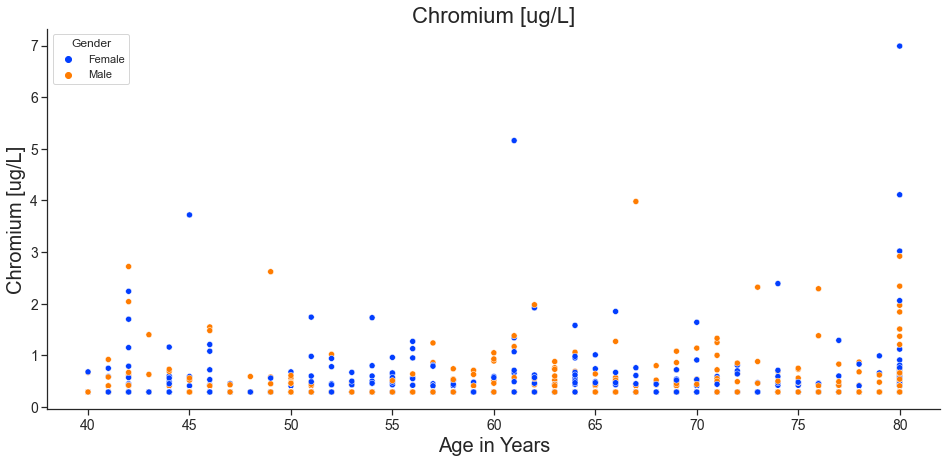

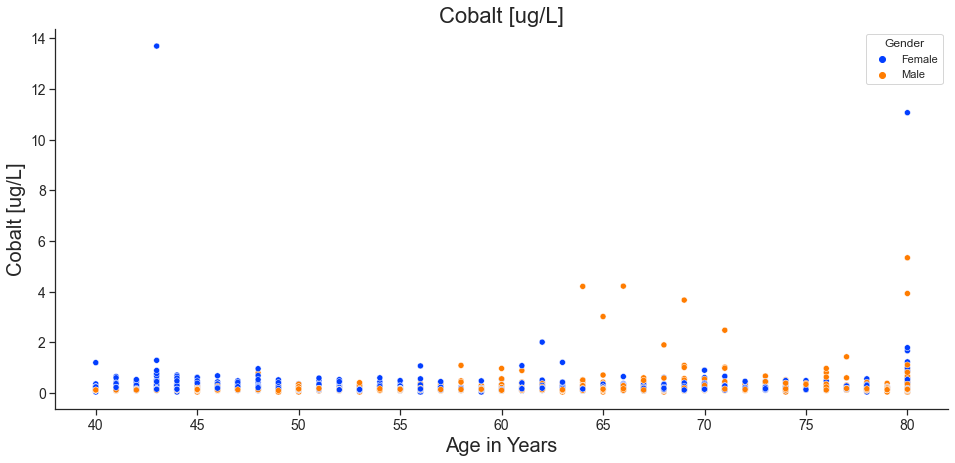

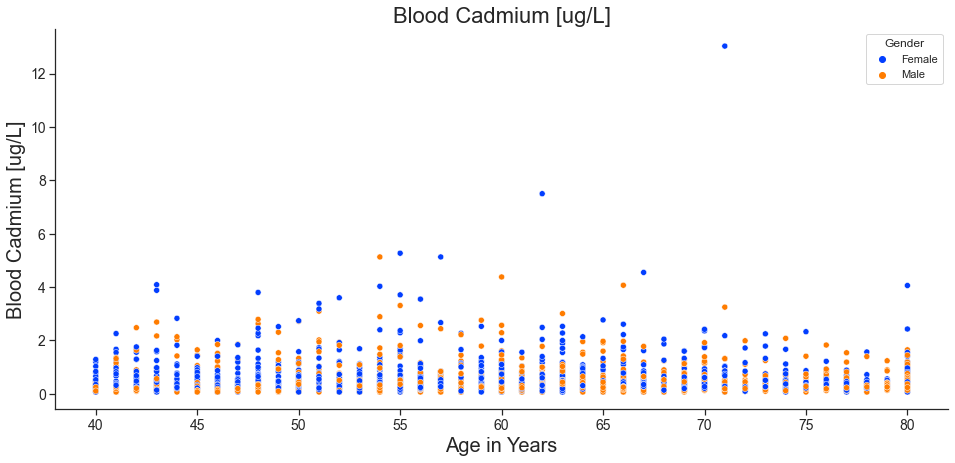

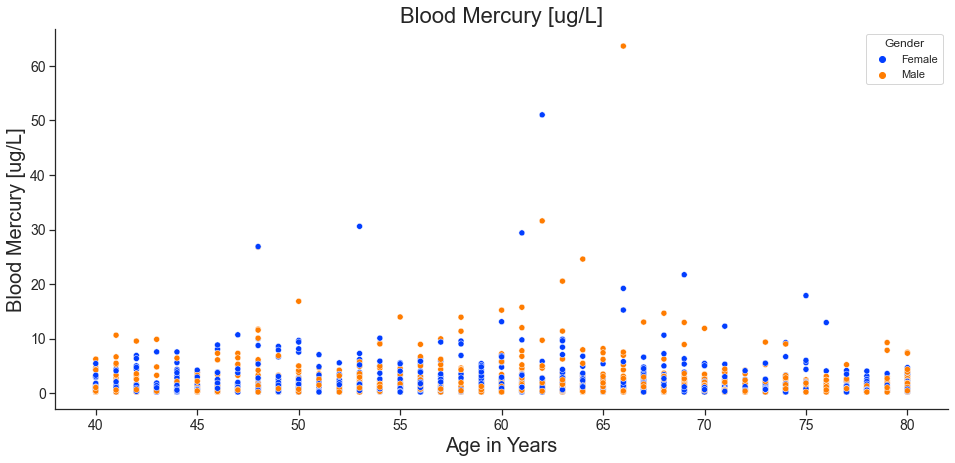

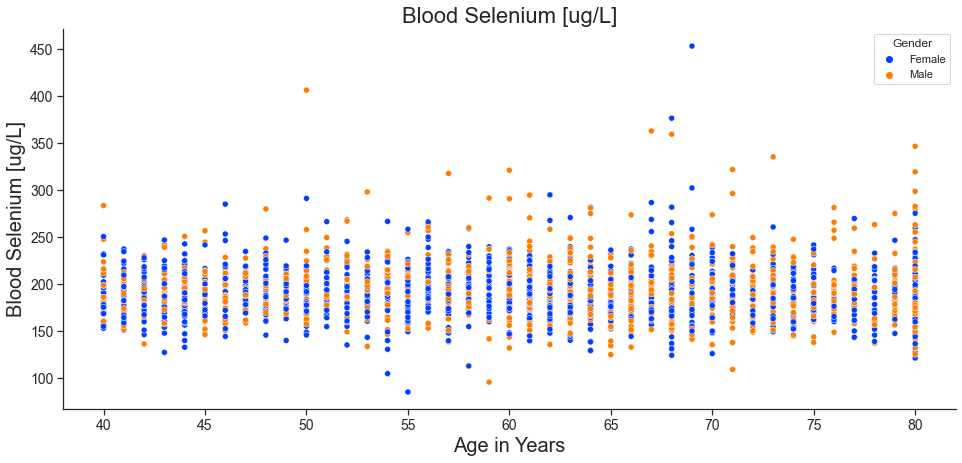

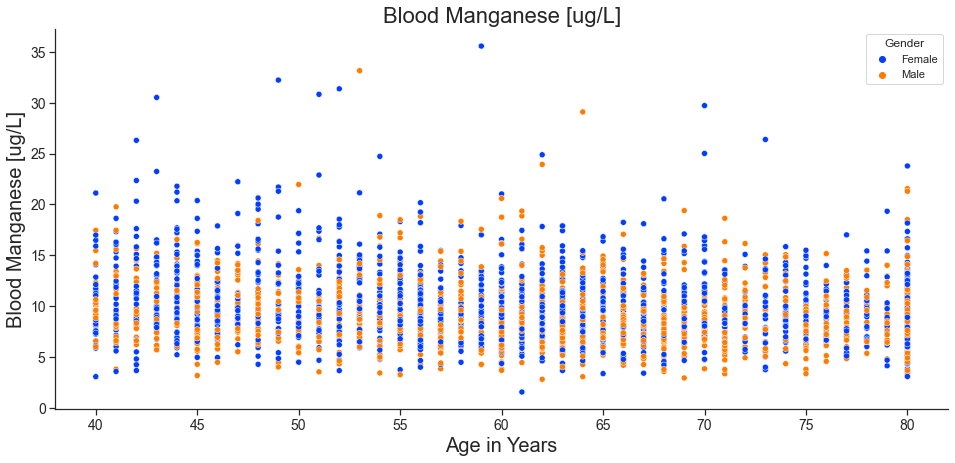

In [51]:
metals = [NHANES_combined["Chromium_ug/L"],NHANES_combined["Cobalt_ug/L"],NHANES_combined["BloodCadmium_ug/L"]
          ,NHANES_combined["BloodMercury_ug/L"],NHANES_combined["BloodSelenium_ug/L"],NHANES_combined["BloodMang_ug/L"]]
names = ["Chromium [ug/L]", "Cobalt [ug/L]","Blood Cadmium [ug/L]","Blood Mercury [ug/L]",
         "Blood Selenium [ug/L]","Blood Manganese [ug/L]","Chromium [ug/L]"]
 
NHANES_combined['Gender'].replace(1, "Male", inplace=True)
NHANES_combined['Gender'].replace(2, "Female", inplace=True)

for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.scatterplot("Age_years", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Age in Years", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    sns.despine()
    plt.show()

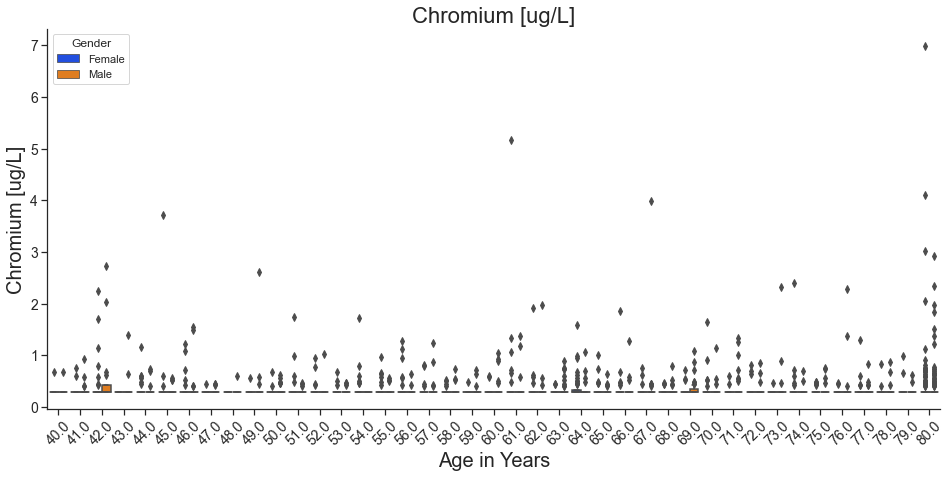

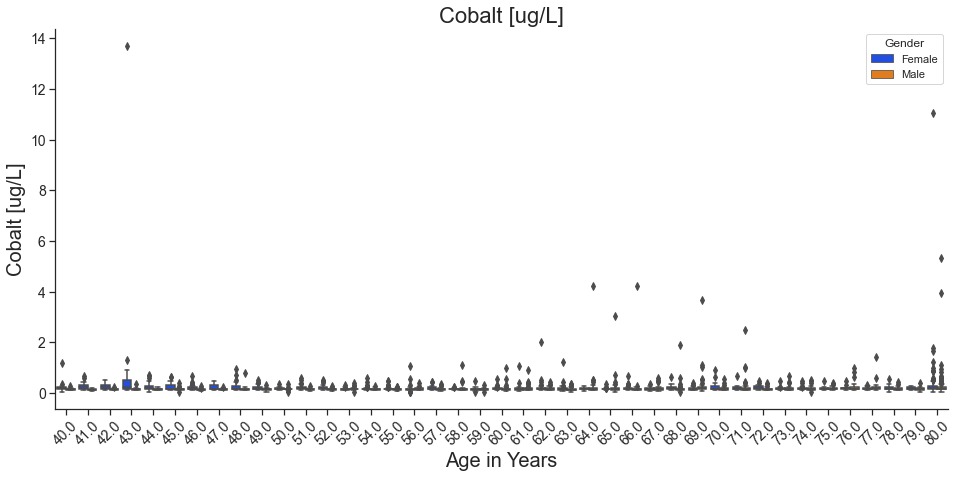

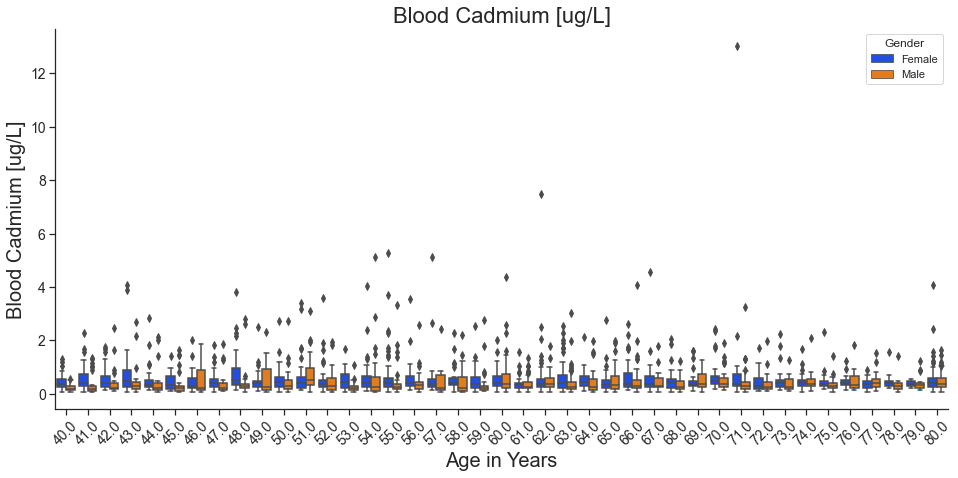

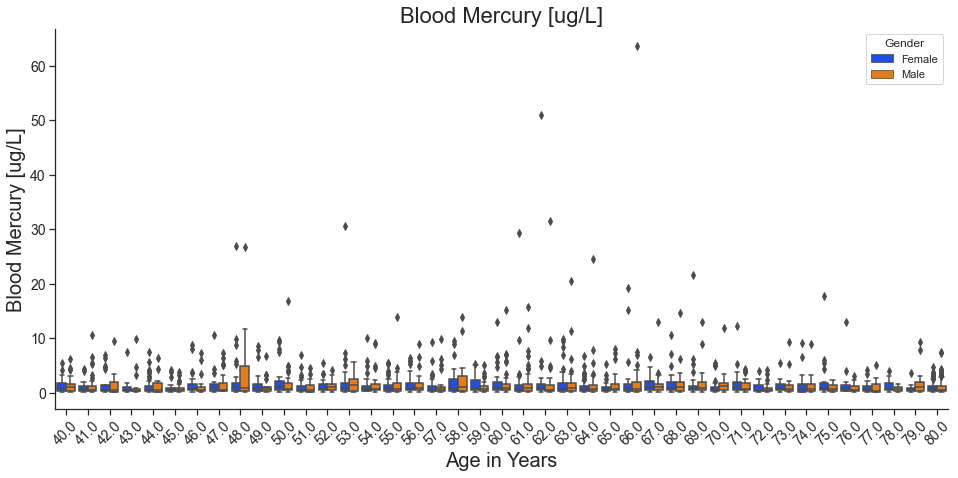

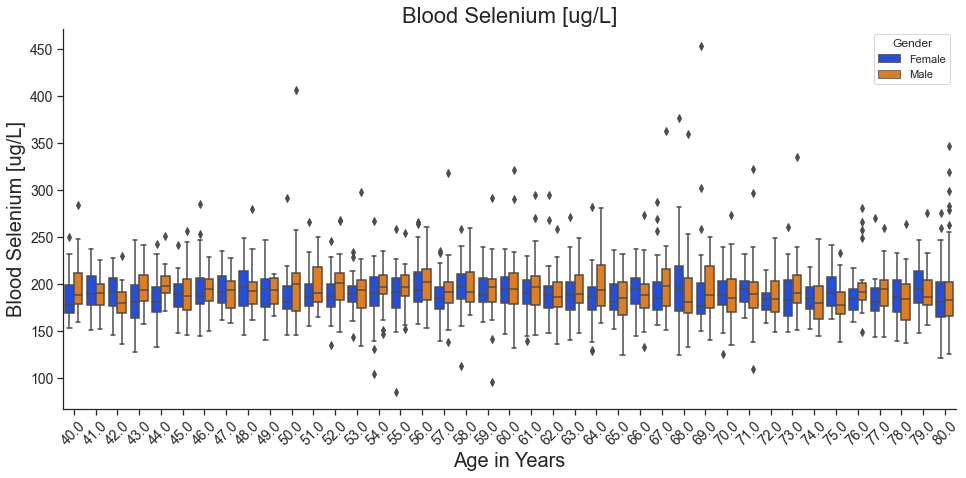

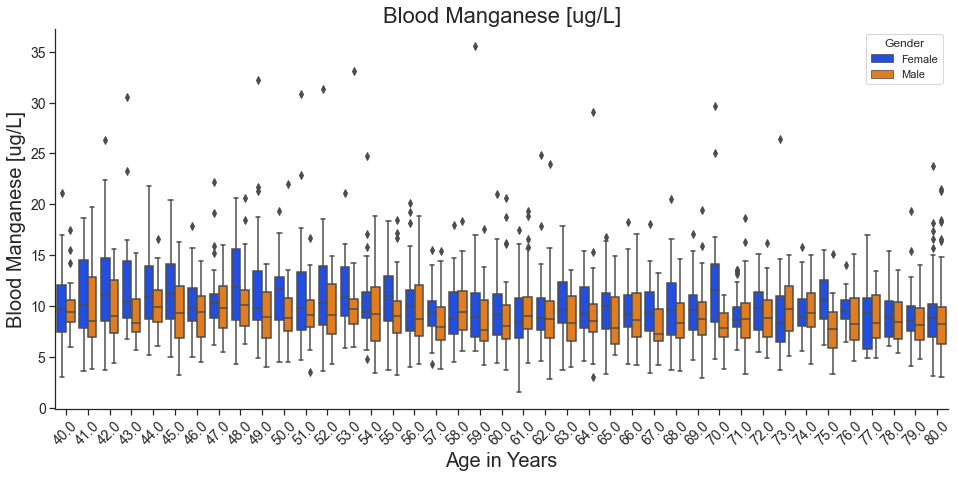

In [52]:
NHANES_combined['Gender'].replace(1, "Male", inplace=True)
NHANES_combined['Gender'].replace(2, "Female", inplace=True)

for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("Age_years", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Age in Years", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

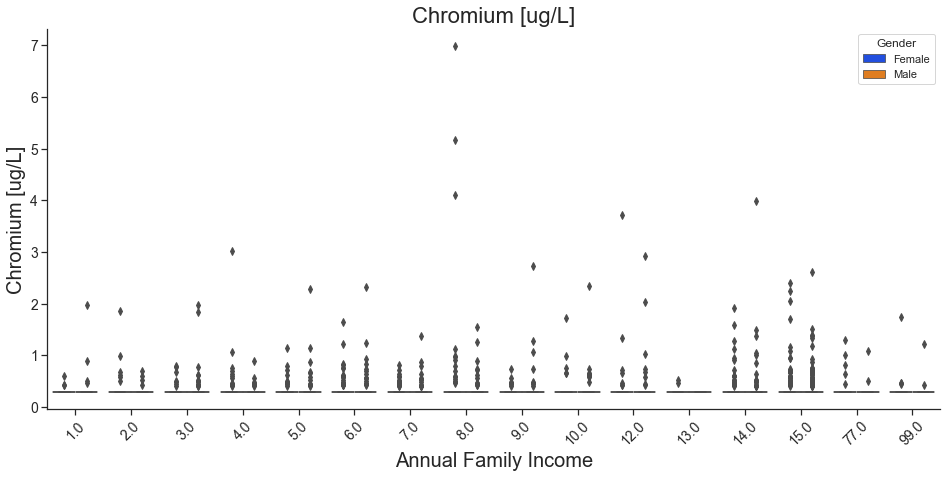

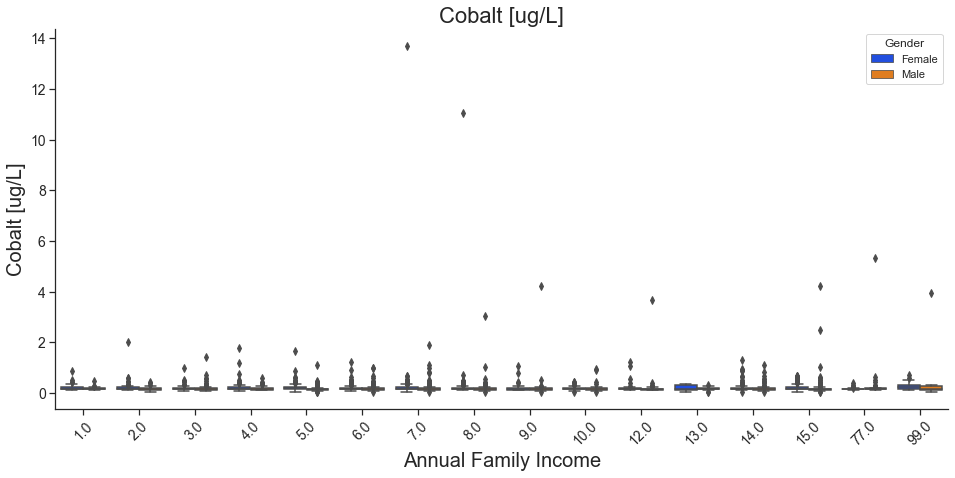

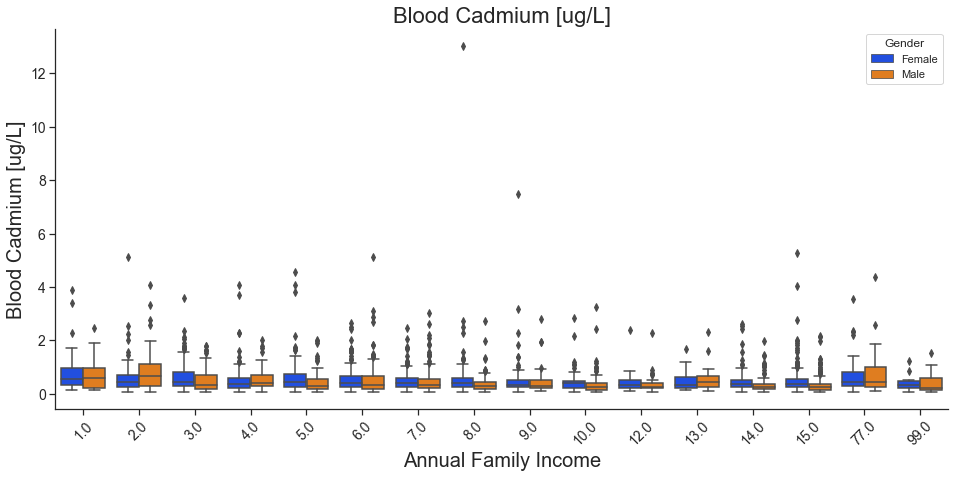

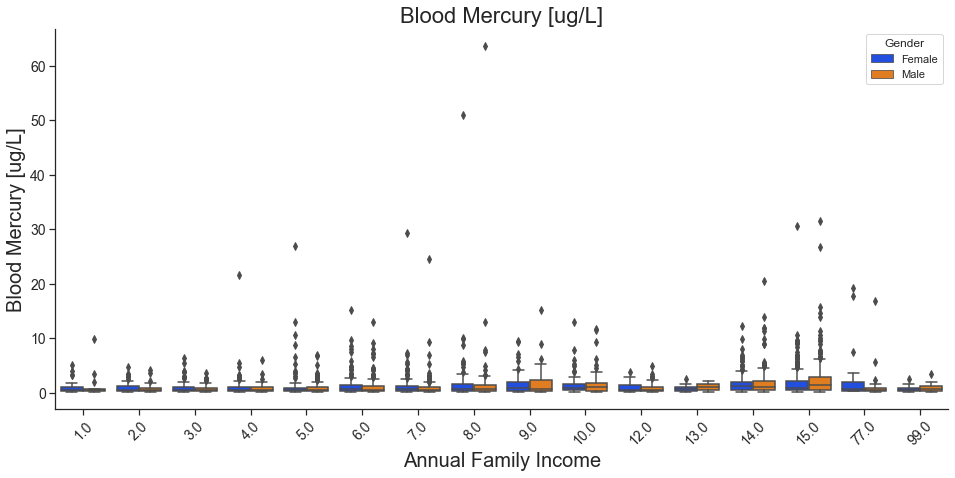

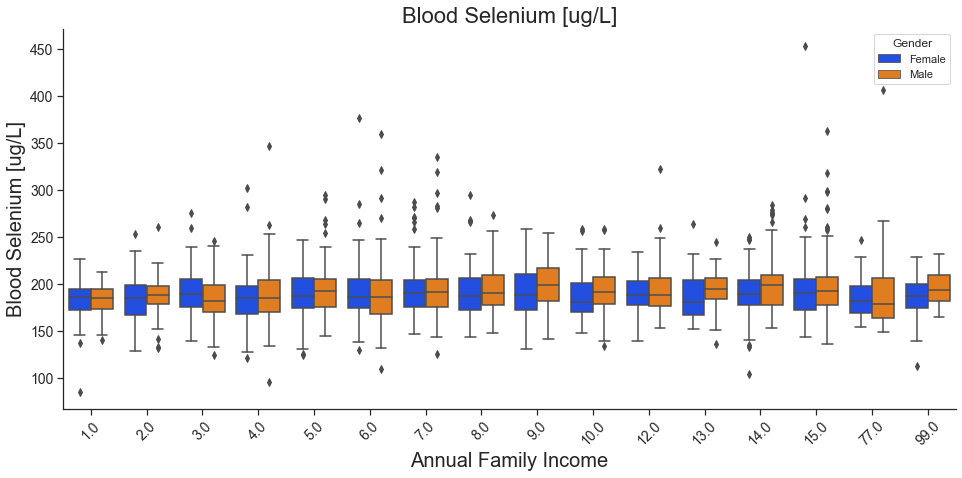

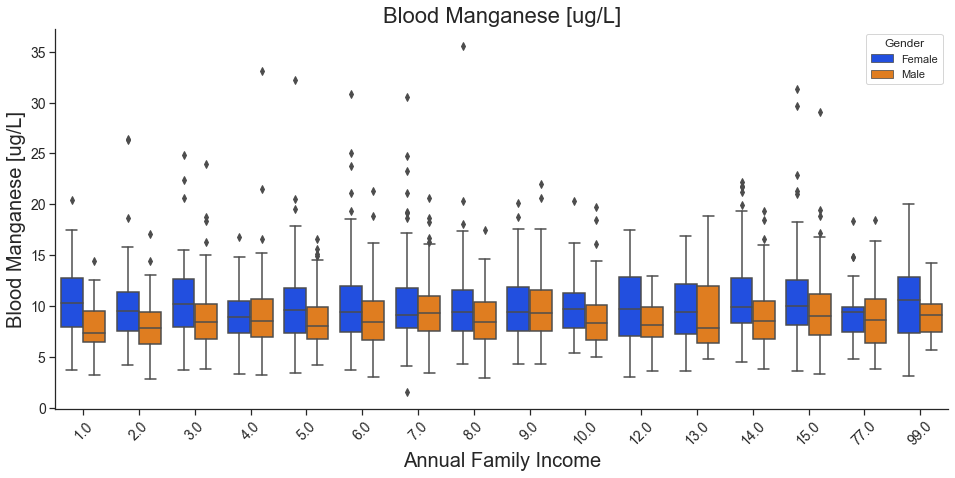

In [53]:

NHANES_combined['Gender'].replace(1, "Male", inplace=True)
NHANES_combined['Gender'].replace(2, "Female", inplace=True)

for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("AnnualFamilyIncome", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Annual Family Income", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

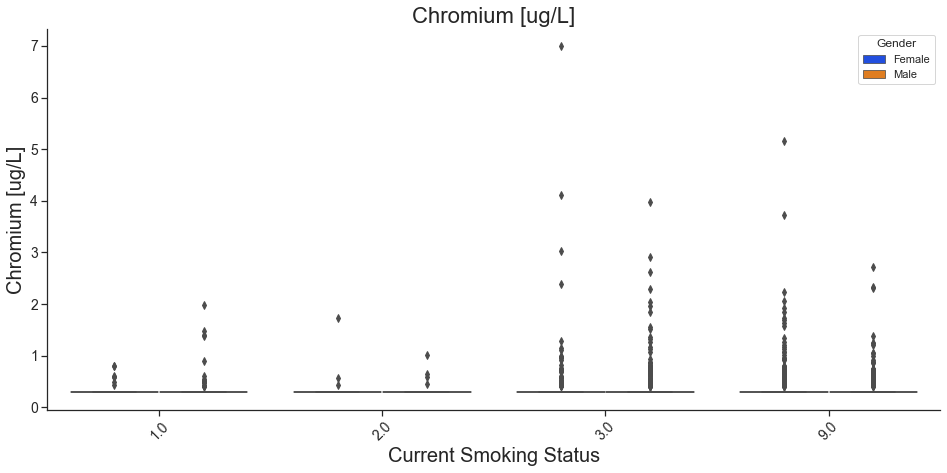

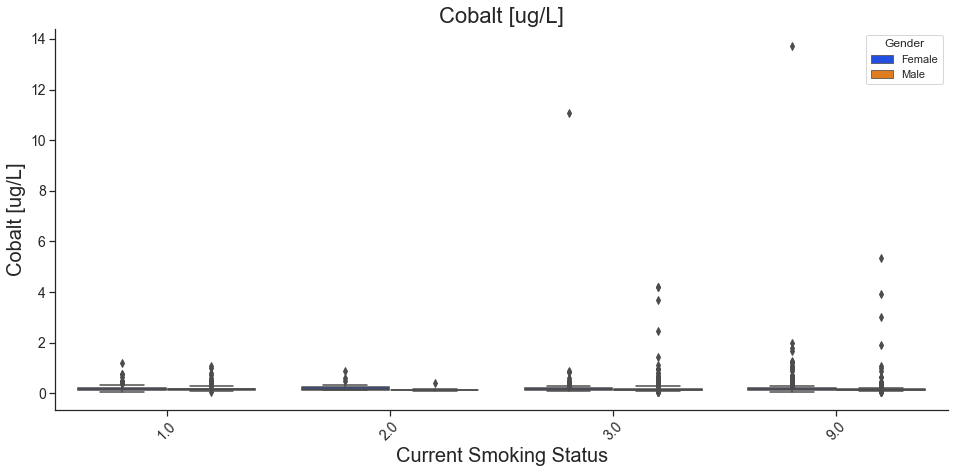

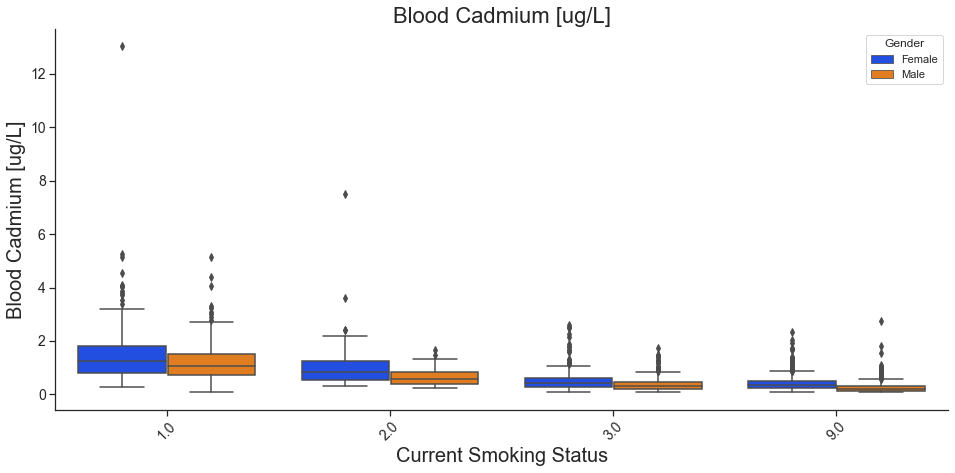

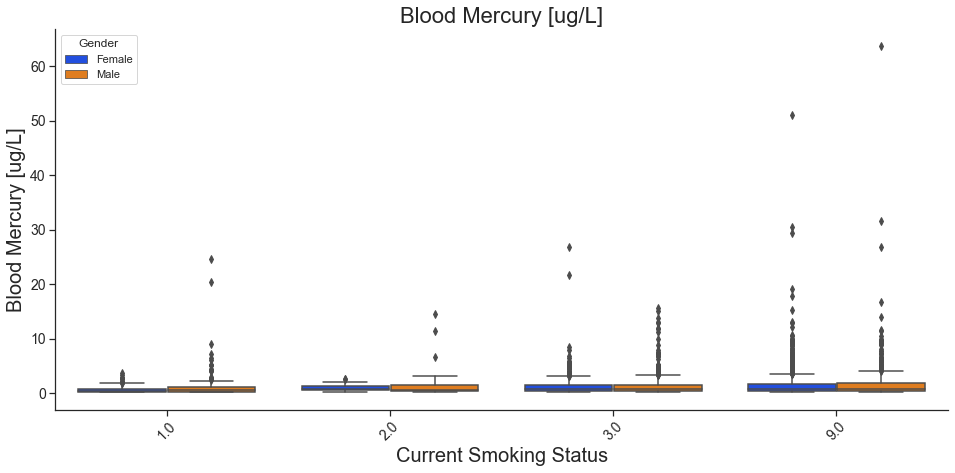

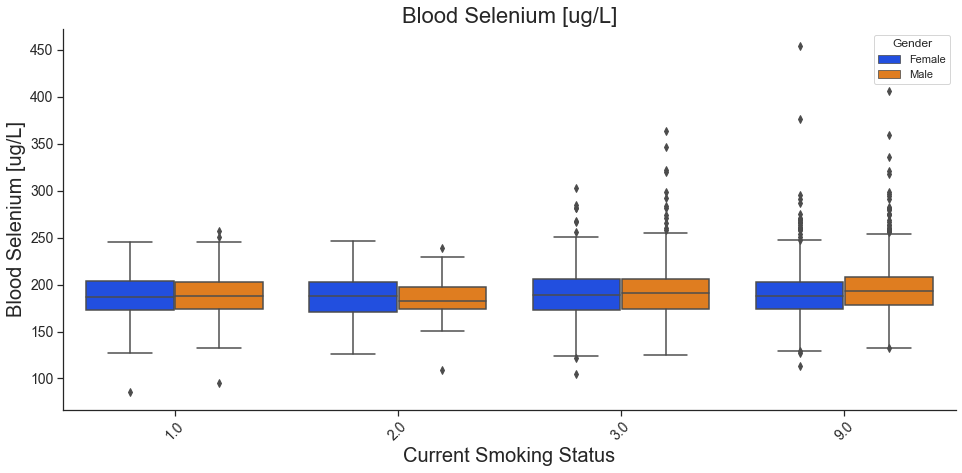

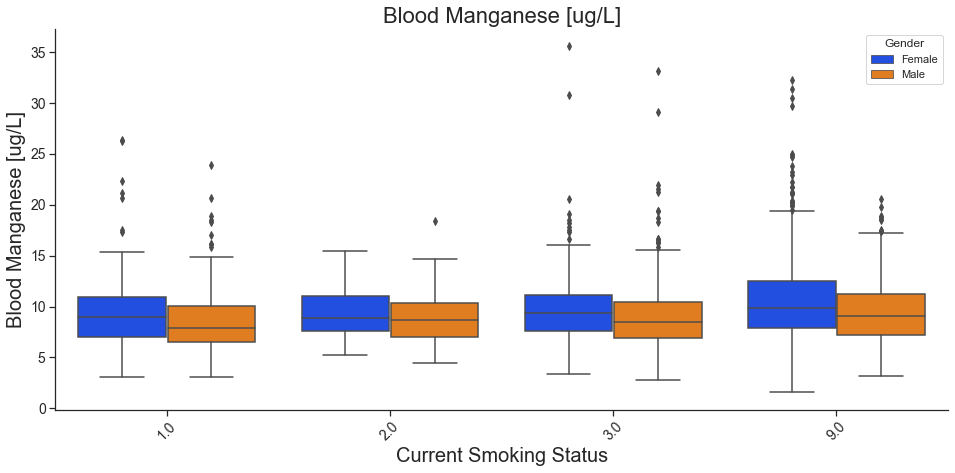

In [54]:
NHANES_combined['Gender'].replace(1, "Male", inplace=True)
NHANES_combined['Gender'].replace(2, "Female", inplace=True)

for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("SmokeNow", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Current Smoking Status", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

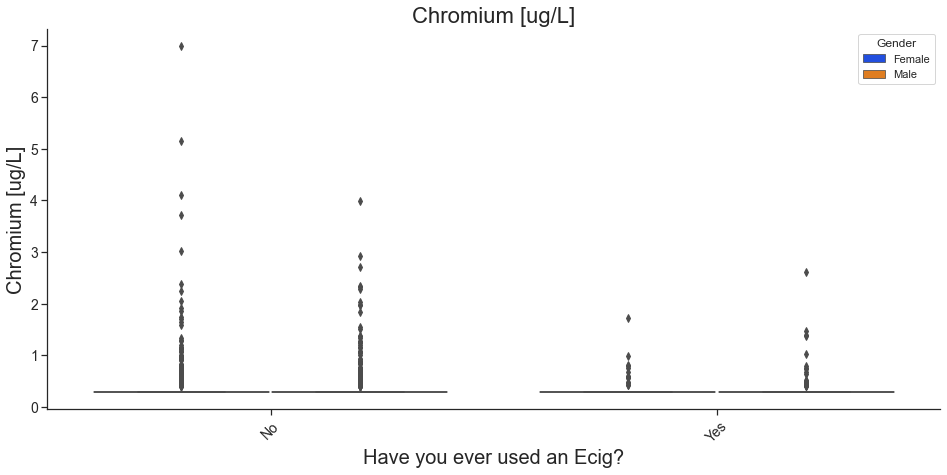

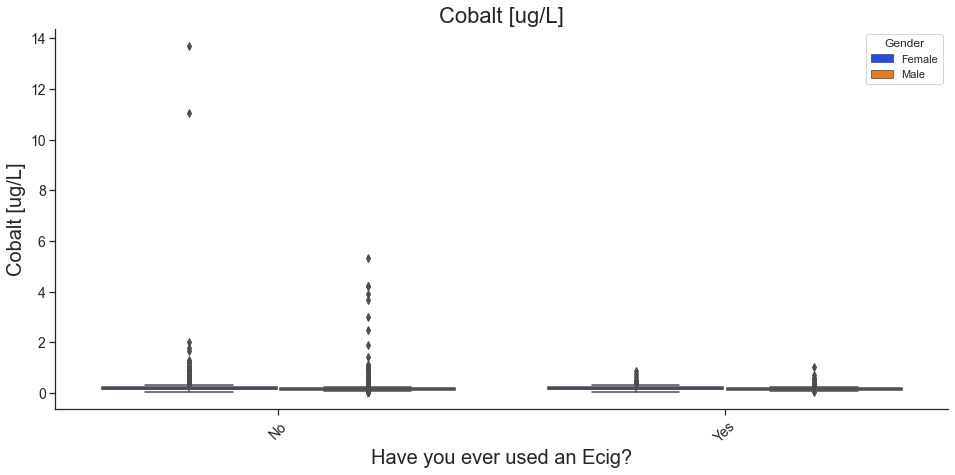

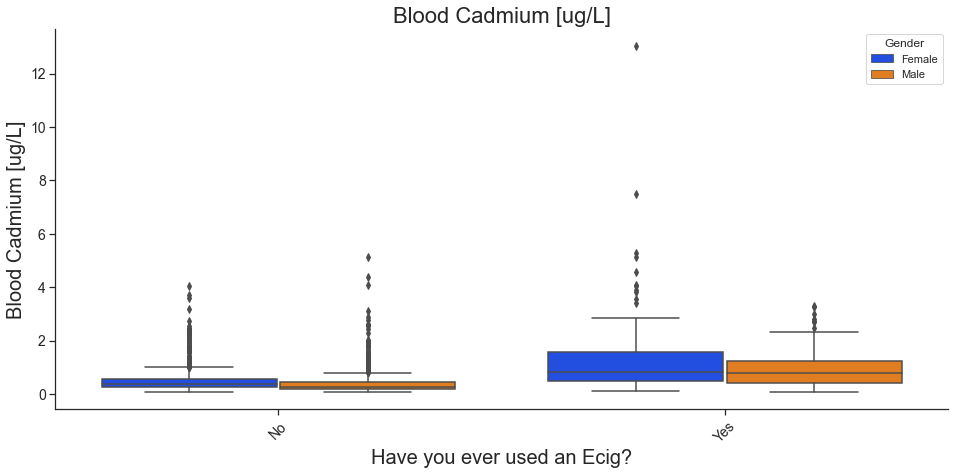

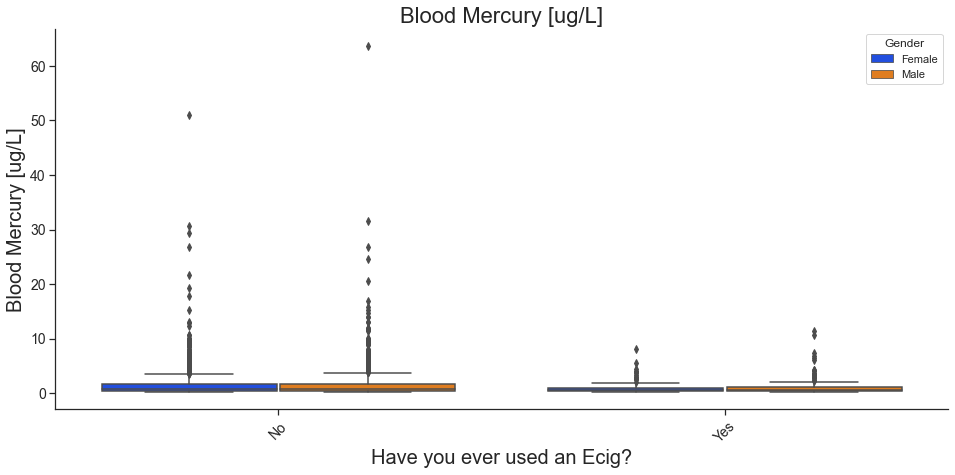

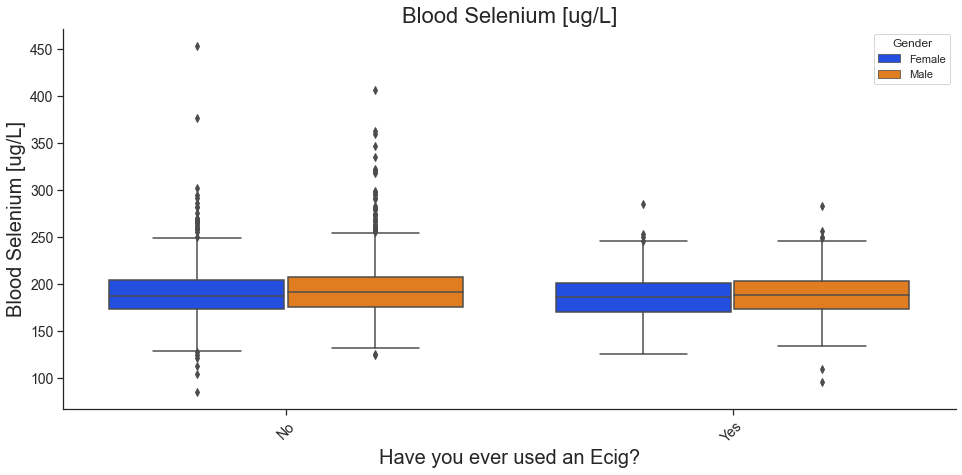

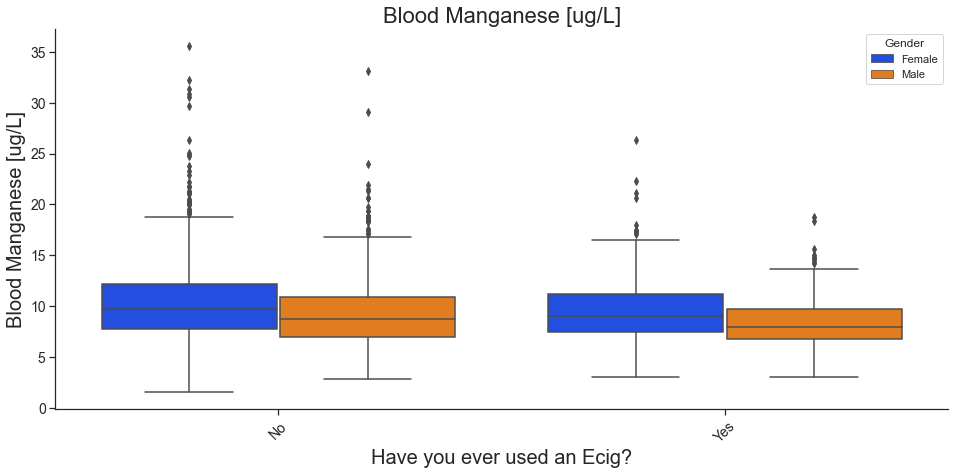

In [55]:
NHANES_combined['Gender'].replace(1, "Male", inplace=True)
NHANES_combined['Gender'].replace(2, "Female", inplace=True)

NHANES_combined['EverUsedEcig'].replace(1, "Yes", inplace=True)
NHANES_combined['EverUsedEcig'].replace(2, "No", inplace=True)
NHANES_combined['EverUsedEcig'].replace(9, "Don't Know/Missing", inplace=True)

for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("EverUsedEcig", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Have you ever used an Ecig?", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()